In [ ]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import preprocessing,neighbors
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from __future__ import absolute_import,print_function, division

import pathlib
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
import seaborn as sns
np.random.seed(123)

In [ ]:
import pandas as pd
df = pd.read_csv("/content/data for paper.csv")

In [ ]:
df.head()

,Shipping,Environmental Impact,Community Characteristics,Labor Workforce Dependency,Vulnerable Population,Logistic,Construction Cost,Living Condition,Average-onsite,Average-offsite,Kind
0,0.50,0.20,0.14,0.25,0.33,0.13,0.17,1.00,3.00,3.00,on-site
1,0.50,0.17,1.00,0.14,0.33,0.20,0.13,0.25,2.80,2.75,on-site
2,0.17,0.14,0.33,0.13,1.00,0.25,0.20,0.50,2.40,1.00,on-site
3,1.00,0.20,0.33,0.13,0.17,0.50,0.25,0.14,2.80,2.50,on-site
4,1.00,0.14,0.17,0.13,0.20,0.50,0.33,0.25,2.75,2.00,on-site


In [ ]:
df.drop(['Average-onsite','Average-offsite'], axis = 1, inplace = True)

In [ ]:
df.head(2)

,Shipping,Environmental Impact,Community Characteristics,Labor Workforce Dependency,Vulnerable Population,Logistic,Construction Cost,Living Condition,Kind
0,0.5,0.20,0.14,0.25,0.33,0.13,0.17,1.00,on-site
1,0.5,0.17,1.00,0.14,0.33,0.20,0.13,0.25,on-site


In [ ]:
df.describe()

,Shipping,Environmental Impact,Community Characteristics,Labor Workforce Dependency,Vulnerable Population,Logistic,Construction Cost,Living Condition
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,0.521940,0.217910,0.303582,0.240746,0.301194,0.518955,0.359403,0.256269
std,0.329417,0.135407,0.263604,0.129829,0.292810,0.342708,0.242574,0.185144
min,0.130000,0.130000,0.130000,0.130000,0.130000,0.130000,0.130000,0.130000
25%,0.200000,0.140000,0.140000,0.170000,0.130000,0.200000,0.200000,0.140000
50%,0.500000,0.200000,0.170000,0.200000,0.170000,0.500000,0.330000,0.250000
75%,1.000000,0.200000,0.330000,0.250000,0.330000,1.000000,0.330000,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.mode()

,Shipping,Environmental Impact,Community Characteristics,Labor Workforce Dependency,Vulnerable Population,Logistic,Construction Cost,Living Condition,Kind
0,0.5,0.2,0.14,0.25,0.13,1.0,0.33,0.25,off-site


In [ ]:
# # dealing with categorical data
scale_mapper = {"off-site":0, "on-site":1}
df["model"] = df["Kind"].replace(scale_mapper)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Shipping                     67 non-null     float64
 1   Environmental Impact         67 non-null     float64
 2   Community Characteristics    67 non-null     float64
 3    Labor Workforce Dependency  67 non-null     float64
 4   Vulnerable Population        67 non-null     float64
 5   Logistic                     67 non-null     float64
 6   Construction Cost            67 non-null     float64
 7   Living Condition             67 non-null     float64
 8   Kind                         67 non-null     object 
 9   model                        67 non-null     int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 5.4+ KB


In [ ]:
df.head()

,Shipping,Environmental Impact,Community Characteristics,Labor Workforce Dependency,Vulnerable Population,Logistic,Construction Cost,Living Condition,Kind,model
0,0.50,0.20,0.14,0.25,0.33,0.13,0.17,1.00,on-site,1
1,0.50,0.17,1.00,0.14,0.33,0.20,0.13,0.25,on-site,1
2,0.17,0.14,0.33,0.13,1.00,0.25,0.20,0.50,on-site,1
3,1.00,0.20,0.33,0.13,0.17,0.50,0.25,0.14,on-site,1
4,1.00,0.14,0.17,0.13,0.20,0.50,0.33,0.25,on-site,1


In [ ]:
X = df.iloc[:,0:8].values
X.shape

(67, 8)

In [ ]:
y = df.model
y.head()

0    1
1    1
2    1
3    1
4    1
Name: model, dtype: int64

In [ ]:
y.value_counts()

0    39
1    28
Name: model, dtype: int64

In [ ]:
# finding the correlation
corr = df.corr()

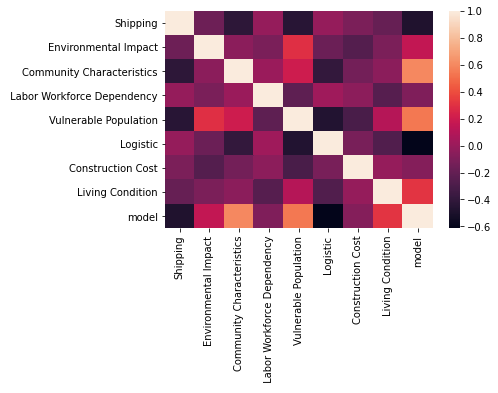

In [ ]:
sns.heatmap(corr)

Standard Scale

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardizing the features
X = StandardScaler().fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None) # create object, pass arcgument in the paranthesis
principalComponents1 = pca.fit_transform(X) # fit and transform the data
explained_variarance = pca.explained_variance_ratio_

In [ ]:
explained_variarance # how much variance is explained by each component

array([2.71085157e-01, 1.67821193e-01, 1.57280722e-01, 1.24670236e-01,
       1.12283995e-01, 9.69271761e-02, 6.99315209e-02, 4.04748300e-33])

# **Data Visualization**

In [ ]:
from sklearn.decomposition import PCA # import library
pca = PCA(n_components=3) # create object, pass arcgument in the paranthesis
principalComponents = pca.fit_transform(X) # fit and transform the data
explained_variarance = pca.explained_variance_ratio_
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
principalDf.head()

,principal component 1,principal component 2,principal component 3
0,1.281145,-1.621136,-2.066345
1,1.709232,-0.288506,0.924782
2,2.548998,-0.607966,-0.903336
3,-0.729282,0.463988,-0.626592
4,-0.962678,-0.146968,-1.096034


In [ ]:
finalDf = pd.concat([principalDf, df.Kind], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,Kind
0,1.281145,-1.621136,-2.066345,on-site
1,1.709232,-0.288506,0.924782,on-site
2,2.548998,-0.607966,-0.903336,on-site
3,-0.729282,0.463988,-0.626592,on-site
4,-0.962678,-0.146968,-1.096034,on-site


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

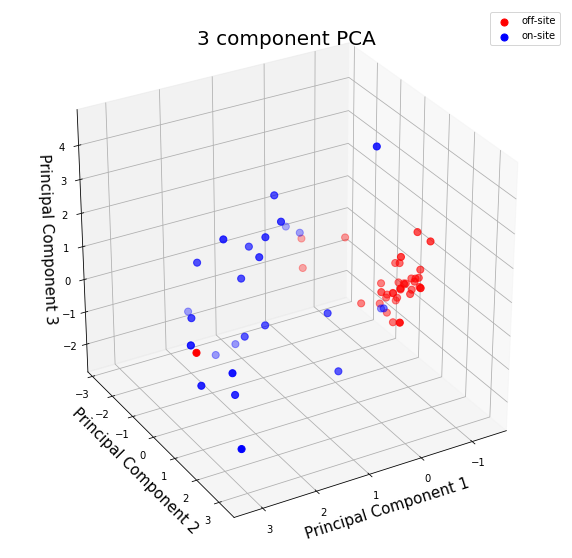

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1,projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
kinds = ['off-site','on-site']
colors = ['r', 'b','g']
for kind, color in zip(kinds,colors):
    indicesToKeep = finalDf['Kind'] == kind
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(kinds)
ax.grid()
# for angle in range(0, 360):
ax.view_init(30,60)
plt.draw()
# plt.pause(.001)

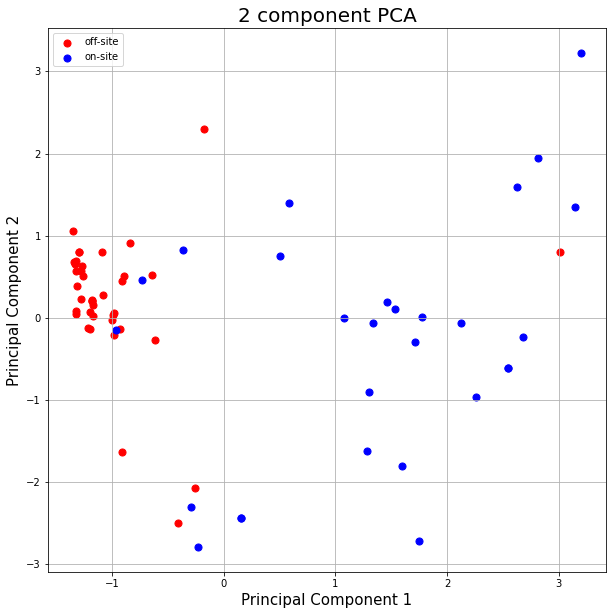

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
#ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
kinds = ['off-site',"on-site"]
colors = ['r', 'b']
for kind, color in zip(kinds,colors):
    indicesToKeep = finalDf['Kind'] == kind
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(kinds)
ax.grid()


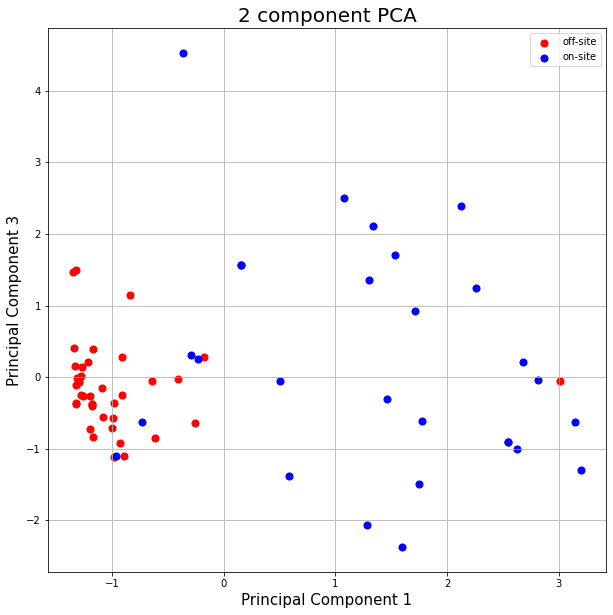

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
kinds = ['off-site',"on-site"]
colors = ['r', 'b']
for kind, color in zip(kinds,colors):
    indicesToKeep = finalDf['Kind'] == kind
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(kinds)
ax.grid()

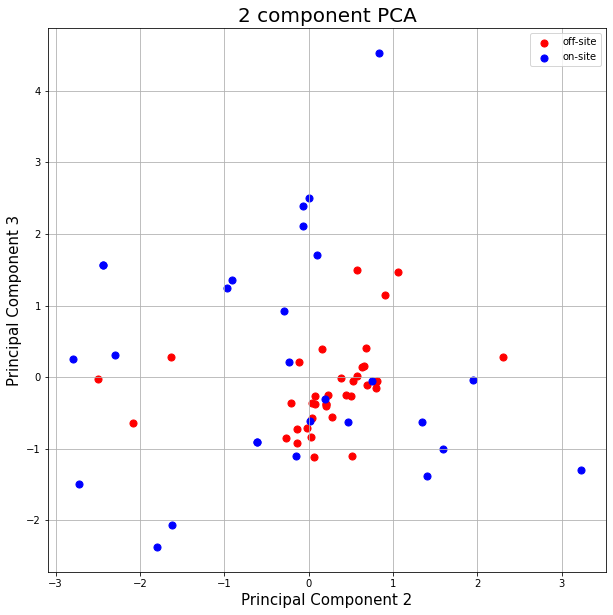

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
kinds = ['off-site',"on-site"]
colors = ['r', 'b']
for kind, color in zip(kinds,colors):
    indicesToKeep = finalDf['Kind'] == kind
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(kinds)
ax.grid()

# **Model**

In [ ]:
#gives the F value
from sklearn.feature_selection import f_classif
f_classif(X,y)
# first array is F value
# second array is p value

(array([19.34578208,  1.69756761, 36.83474031,  0.55242954, 27.058348  ,
        39.32079816,  0.33926071,  7.25769857]),
 array([4.13585468e-05, 1.97203337e-01, 7.36054922e-08, 4.60004748e-01,
        2.15237625e-06, 3.29743998e-08, 5.62271364e-01, 8.97346499e-03]))

In [ ]:
##search for an optimal value of K
from sklearn.model_selection import cross_val_score
k_range = range(1,16)
k_scores = []
for k in k_range:
  knn = neighbors.KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X, y, cv=5, scoring = "accuracy")
  k_scores.append(scores.mean())
print (k_scores) 

[0.8516483516483516, 0.8362637362637363, 0.8835164835164836, 0.8527472527472527, 0.8384615384615385, 0.823076923076923, 0.8373626373626373, 0.7923076923076924, 0.8076923076923077, 0.8076923076923077, 0.8076923076923077, 0.8076923076923077, 0.8076923076923077, 0.7615384615384616, 0.7615384615384616]


Text(0, 0.5, 'cross-validated accuracy')

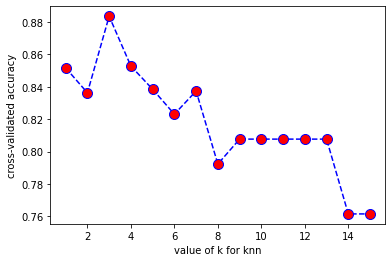

In [ ]:
import matplotlib.pyplot as plt
#plot the value of k for knn (x_axis) versus the cross_validated accuracy (y_value)
plt.plot(k_range, k_scores,color = "blue", linestyle = "dashed", marker = "o",
         markerfacecolor = "red", markersize = 10)
plt.xlabel("value of k for knn")
plt.ylabel("cross-validated accuracy")

Normalize Data

In [ ]:
from sklearn import preprocessing
X = preprocessing.scale(X)

In [ ]:
#from sklearn.linear_model import LinearRegression
#from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
#parameter tuning using cross_val
from sklearn.model_selection import cross_val_score
clf = neighbors.KNeighborsClassifier(n_neighbors=3) # number of K
scores = cross_val_score(clf, X, y, cv=5) # check what is CV
scores

array([0.71428571, 0.85714286, 0.92307692, 0.92307692, 1.        ])

In [ ]:
print(scores.mean())

0.8835164835164836


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape, Y_train.shape, X_test.shape, Y_test. shape

((53, 8), (53,), (14, 8), (14,))

Recursive Elimination

In [ ]:
clf.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
accuracy = clf.score(X_test, Y_test)
print(accuracy)

0.8571428571428571


In [ ]:
from sklearn import metrics

In [ ]:
y_predict = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_predict))

Accuracy: 0.8571428571428571


In [ ]:
#Confusion Matrix
#table that describes the performance of a classification model
print(metrics.confusion_matrix(Y_test,y_predict))
#bottom right = true positive
#upper left = true negative
#upper right = false positive
# bottom left = false negative

[[9 1]
 [1 3]]


In [ ]:
confusion = metrics.confusion_matrix(Y_test,y_predict)

In [ ]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [ ]:
Metrics_accuracy = (TP +TN)/ (TP +TN +FP+FN)
print(Metrics_accuracy)

0.8571428571428571


In [ ]:
#Sensitivity = when the actual value is positive, how often is the prediction correct
print (TP/float(TP +FN))
print(metrics.recall_score(Y_test,y_predict))

0.75
0.75


In [ ]:
#The ability of the classifier not to label as positive a sample that is negative.
print(metrics.precision_score(Y_test,y_predict))

0.75


In [ ]:
# building the optimal model using backward elimination
# SL = 0.05 and eliminating those features which have p > SL
import statsmodels.api as sm
X= np.append(arr = np.ones((67,1)).astype(int), values = X, axis = 1)
X_opt = X[:,[0, 1, 2, 3, 4, 5, 6, 7,8]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  model   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     18.37
Date:                Fri, 25 Dec 2020   Prob (F-statistic):           1.01e-12
Time:                        17:37:07   Log-Likelihood:                -8.9627
No. Observations:                  67   AIC:                             33.93
Df Residuals:                      59   BIC:                             51.56
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4179      0.036     11.605      0.000       0.346       0.490
x1            -0.1041      0.030     -3.489      0.001      -0.164      -0.044
x2             0.0228      0.038      0.601      0.550      -0.053       0.099
x3             0.1730      0.034      5.058      0.000       0.105       0.241
x4             0.0024      0.036      0.065      0.948      -0.070       0.075
x5             0.0906      0.037      2.478      0.016       0.017       0.164
x6            -0.1651      0.029     -5.638      0.000      -0.224      -0.107
x7            -0.0080      0.033     -0.245      0.807      -0.074       0.057
x8             0.0937      0.035      2.644      0.010       0.023       0.165
==============================================================================
Omnibus:                       13.527   Durbin-Watson:                   1.263
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               46.985
Skew:                           0.232   Prob(JB):                     6.27e-11
Kurtosis:                       7.076   Cond. No.                     5.50e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.81e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# remove the variable with the highest p value
X_opt = X[:,[0, 1, 2, 3,5, 6,7,8]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  model   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     18.37
Date:                Fri, 25 Dec 2020   Prob (F-statistic):           1.01e-12
Time:                        17:37:07   Log-Likelihood:                -8.9627
No. Observations:                  67   AIC:                             33.93
Df Residuals:                      59   BIC:                             51.56
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4179      0.036     11.605      0.000       0.346       0.490
x1            -0.1101      0.101     -1.095      0.278      -0.311       0.091
x2             0.0203      0.053      0.382      0.704      -0.086       0.127
x3             0.1682      0.087      1.929      0.058      -0.006       0.343
x4             0.0852      0.089      0.962      0.340      -0.092       0.263
x5            -0.1714      0.105     -1.631      0.108      -0.382       0.039
x6            -0.0124      0.077     -0.161      0.873      -0.167       0.142
x7             0.0904      0.059      1.543      0.128      -0.027       0.208
==============================================================================
Omnibus:                       13.527   Durbin-Watson:                   1.263
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               46.985
Skew:                           0.232   Prob(JB):                     6.27e-11
Kurtosis:                       7.076   Cond. No.                         8.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# remove the variable with the highest p value
X_opt = X[:,[0, 1, 2, 3,5,7,8]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  model   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     20.42
Date:                Fri, 25 Dec 2020   Prob (F-statistic):           7.36e-13
Time:                        17:37:07   Log-Likelihood:                -10.441
No. Observations:                  67   AIC:                             34.88
Df Residuals:                      60   BIC:                             50.31
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4179      0.037     11.448      0.000       0.345       0.491
x1             0.0340      0.049      0.697      0.488      -0.064       0.132
x2             0.0773      0.041      1.900      0.062      -0.004       0.159
x3             0.2926      0.043      6.842      0.000       0.207       0.378
x4             0.2104      0.045      4.686      0.000       0.121       0.300
x5             0.0936      0.042      2.216      0.031       0.009       0.178
x6             0.1632      0.038      4.250      0.000       0.086       0.240
==============================================================================
Omnibus:                       11.229   Durbin-Watson:                   1.400
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               31.335
Skew:                           0.192   Prob(JB):                     1.57e-07
Kurtosis:                       6.328   Cond. No.                         2.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X_train_opt, X_test_opt, Y_train_opt, Y_test_opt = train_test_split(X_opt,y, test_size=0.2, random_state=0)

In [ ]:
clf.fit(X_train_opt,Y_train_opt)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
accuracy = clf.score(X_test_opt, Y_test_opt)
print(accuracy)

0.8571428571428571


In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9285714285714286


In [ ]:
import statsmodels.api as sm
from scipy import stats

In [ ]:
X2 = sm.add_constant(X_train)
est = sm.OLS(Y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  model   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     18.35
Date:                Fri, 25 Dec 2020   Prob (F-statistic):           2.79e-11
Time:                        17:37:07   Log-Likelihood:                -2.4762
No. Observations:                  53   AIC:                             20.95
Df Residuals:                      45   BIC:                             36.71
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4336      0.039     11.246      0.0

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [ ]:
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

In [ ]:
Y_test

27    0
56    1
35    0
33    0
31    0
48    1
22    0
42    0
46    0
26    0
40    0
53    1
41    0
55    1
Name: model, dtype: int64

In [ ]:
Xr = X_test[:,0:2]
Yr = Y_test
h = .02 # step size in the mesh

knn=neighbors.KNeighborsClassifier()
knn.fit(Xr, Yr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
Xr = df.iloc[:,:2].values# we only take the first two features. 
Yr = df.model


h = .02 # step size in the mesh

knn=neighbors.KNeighborsClassifier()

# we create an instance of Neighbours Classifier and fit the data.
knn.fit(Xr, Yr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

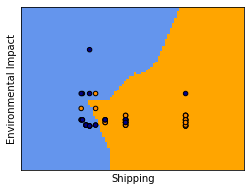

In [ ]:
# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = Xr[:,0].min() - .5, Xr[:,0].max() + .5
y_min, y_max = Xr[:,1].min() - .5, Xr[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z,cmap=cmap_light)

# Plot also the training points
plt.scatter(Xr[:,0], Xr[:,1],c=Yr,cmap=cmap_bold,
                edgecolor='k', s=20 )
plt.xlabel('Shipping')
plt.ylabel('Environmental Impact')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
Xt = df.iloc[:, np.r_[5, 7]].values
Yt = df.model

h = .02 # step size in the mesh

knn1=neighbors.KNeighborsClassifier()

# we create an instance of Neighbours Classifier and fit the data.
knn1.fit(Xr, Yr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

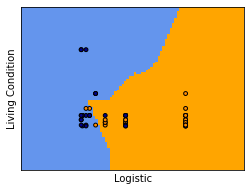

In [ ]:
# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = Xt[:,0].min() - .5, Xt[:,0].max() + .5
y_min, y_max = Xt[:,1].min() - .5, Xt[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn1.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z,cmap=cmap_light)

# Plot also the training points
plt.scatter(Xt[:,0], Xt[:,1],c=Yt,cmap=cmap_bold,
                edgecolor='k', s=15)
plt.xlabel('Logistic')
plt.ylabel('Living Condition')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
Xt = df.iloc[:, np.r_[0, 4]].values
Yt = df.model


h = .02 # step size in the mesh

knn1=neighbors.KNeighborsClassifier()

# we create an instance of Neighbours Classifier and fit the data.
knn1.fit(Xt, Yt)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

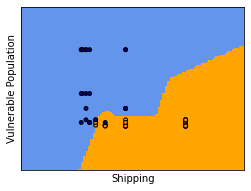

In [ ]:
# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = Xt[:,0].min() - .5, Xt[:,0].max() + .5
y_min, y_max = Xt[:,1].min() - .5, Xt[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn1.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z,cmap=cmap_light)

# Plot also the training points
plt.scatter(Xt[:,0], Xt[:,1],c=Yt,cmap=cmap_bold,
                edgecolor='k', s=15)
plt.xlabel('Shipping')
plt.ylabel('Vulnerable Population')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()